# Dose depth deposition plotting
K. Sjobak, January 2019

The purpose of this script is to plot the dose deposition in a few different ways as a function of depth and material, for different beam parameters.

## Code setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import ROOT
import os

Welcome to JupyROOT 6.28/06


In [2]:
%matplotlib notebook

# plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams['figure.dpi'] = 100
# 
# #colorCycle = plt.rcParams['axes.prop_cycle']
# plt.rcParams['figure.max_open_warning'] = 100

In [3]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [4]:
#Setup MiniScatter
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots

## Physics setup

In [5]:
SI_e = 1.60217662e-19 #[C]

In [6]:
### Basic simulation parameters ###

QUIET = False
TRYLOAD = True #Try to load already existing data instead of recomputing?

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS"
baseSimSetup["PHYS"] = "QGSP_BERT"
baseSimSetup["N"] = 100000

baseSimSetup["ENERGY"] = 215.0 #[MeV]
#EPS   = 3.0 #[um]
#BETA  = 1.4 #[m]
#ALPHA = 0.0
#baseSimSetup["COVAR"] = (EPS,BETA,ALPHA) #Use pencil beam

#baseSimSetup["ZOFFSET_BACKTRACK"] = True
baseSimSetup["ZOFFSET"]           = 0.0 #Auto

baseSimSetup["WORLDSIZE"] = 1000.0

baseSimSetup["DIST"] = 3000.0 #Detector distance from target center [mm] 

baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files
baseSimSetup["EDEP_DZ"]   = 1.0

#Lowest energy particles to consider for analysis
#E_CUTOFF = baseSimSetup["ENERGY"]*0.9;

#Store the .root files in a subfolder from MiniScatter/examples, to be easy to find
baseSimSetup["OUTFOLDER"]=os.path.join(os.getcwd(),"DoseDepthDeposition")
baseSimSetup["THICK"] = 3000
baseSimSetup["MAT"] = "G4_WATER"

## Simulations

### Electrons, pencil beam

In [7]:
baseSimSetup_e = baseSimSetup.copy()
baseSimSetup_e["BEAM"]    = "e-"
baseSimSetup_e["OUTNAME"] = "electrons"

(twiss_e, numPart_e, objects_e) = miniScatterDriver.getData_tryLoad(baseSimSetup_e, tryload=TRYLOAD,\
    getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/electrons.root', loading!


In [8]:
rzScaled_e = miniScatterPlots.plotRZgray(objects_e, baseSimSetup_e["N"], 1e-9/SI_e)

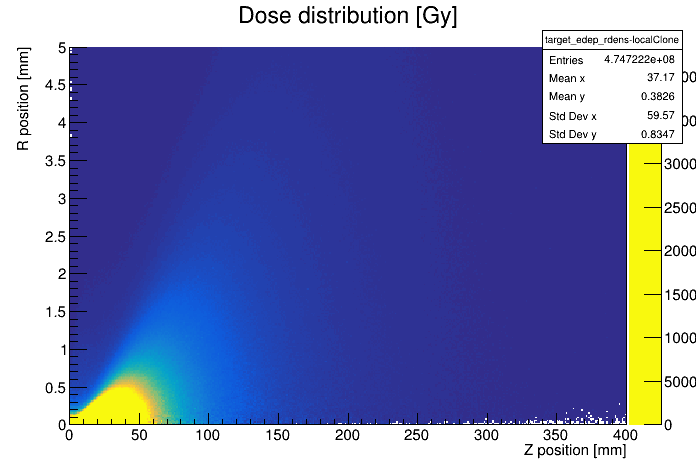

In [9]:
canvas = ROOT.TCanvas()
rzScaled_e.SetContour(100, np.linspace(0,40,100))
rzScaled_e.GetXaxis().SetRangeUser(0,400)
rzScaled_e.GetYaxis().SetRangeUser(0,5)
rzScaled_e.Draw('colz')
canvas.Draw()

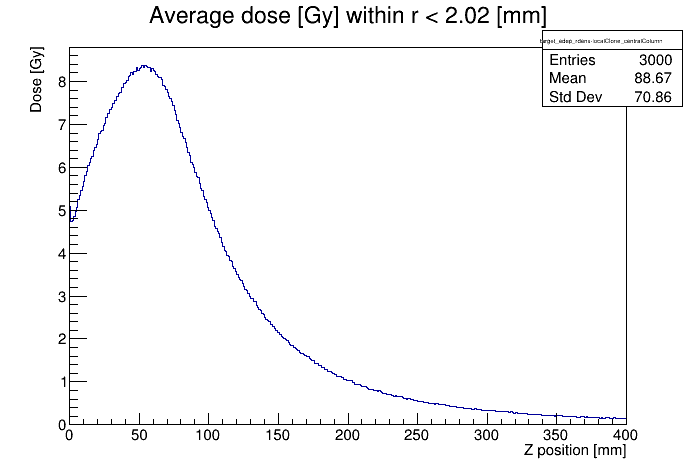

In [10]:
rzScaled_center_e = miniScatterPlots.plotZgray(rzScaled_e, 2.0)
rzScaled_center_e.GetXaxis().SetRangeUser(0,400)
canvas = ROOT.TCanvas()
rzScaled_center_e.Draw()
canvas.Draw()

### Electrons, 3 mm wide and parallel gaussian beam

In [11]:
baseSimSetup_ew = baseSimSetup.copy()
baseSimSetup_ew["BEAM"]   = "e-"
baseSimSetup_ew["OUTNAME"]="electrons-wide"

EPS_w   = 10.0 #[um]
SIGMA_w  = 3.0e-3 #[m]
#SIGMAs_w = 0.0 #[rad]

BETA_w  = SIGMA_w**2/((EPS_w*0.511/baseSimSetup_ew["ENERGY"])*1e-6) #[m]
ALPHA_w = 0.0
print("BETA_w =", BETA_w, "[m]")
baseSimSetup_ew["COVAR"] = (EPS_w,BETA_w,ALPHA_w)

(twiss_ew, numPart_ew, objects_ew) = miniScatterDriver.getData_tryLoad(baseSimSetup_ew, tryload=TRYLOAD,\
    getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata", "init_xy"])


BETA_w = 378.66927592954994 [m]
Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/electrons-wide.root', loading!


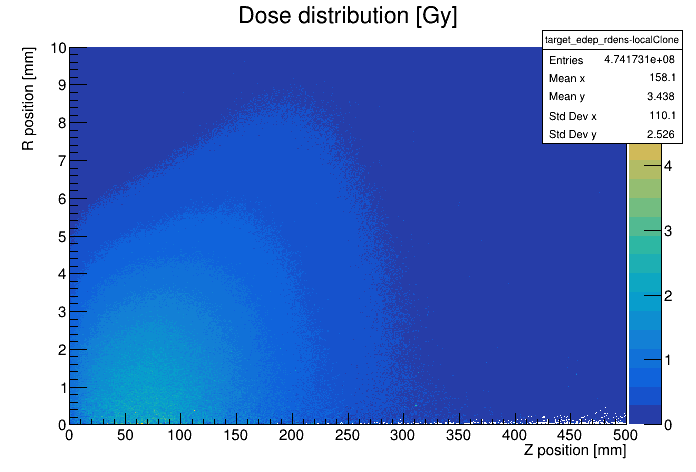

In [12]:
rzScaled_ew = miniScatterPlots.plotRZgray(objects_ew, baseSimSetup_ew["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
#rzScaled_ew.SetContour(100, np.linspace(0,40,100))
rzScaled_ew.GetXaxis().SetRangeUser(0,500)
rzScaled_ew.GetYaxis().SetRangeUser(0,10)

rzScaled_ew.Draw('colz')
canvas.Draw()

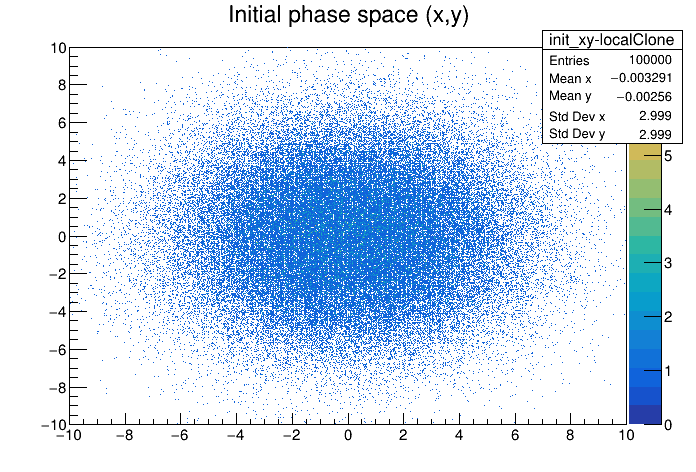

In [13]:
c = ROOT.TCanvas()
objects_ew['init_xy'].Draw('colz')
c.Draw()

### Electrons, 3 mm wide uniform beam

In [14]:
baseSimSetup_ewf = baseSimSetup.copy()
baseSimSetup_ewf["BEAM"] = "e-"
baseSimSetup_ewf["OUTNAME"]="electrons_wide-flat"
baseSimSetup_ewf['N'] = baseSimSetup_ew['N']

baseSimSetup_ewf["BEAM_RCUT"] = 3.0

(twiss_ewf, numPart_ewf, objects_ewf) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_ewf, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata", 'init_x', 'init_y', 'init_xy'])

print()
print (twiss_ewf['init'])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/electrons_wide-flat.root', loading!

{'x': {'eps': 0.0, 'beta': inf, 'alpha': nan, 'posAve': -0.005807286365868552, 'angAve': 0.0, 'posVar': 2.263858764164272, 'angVar': 0.0, 'coVar': 0.0}, 'y': {'eps': 0.0, 'beta': inf, 'alpha': nan, 'posAve': -0.0038891217551922258, 'angAve': 0.0, 'posVar': 2.239968635210478, 'angVar': 0.0, 'coVar': 0.0}}


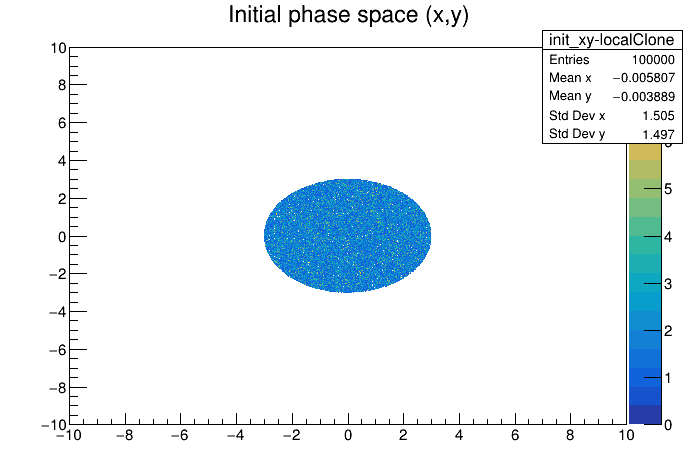

In [15]:
c = ROOT.TCanvas()
objects_ewf['init_xy'].Draw('colz')
c.Draw()

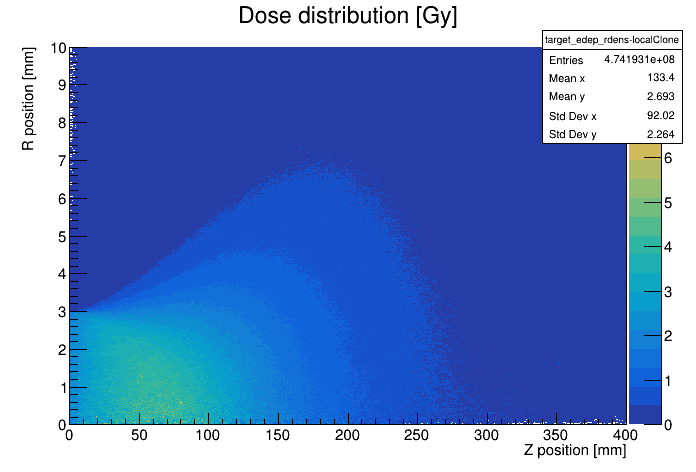

In [16]:
rzScaled_ewf = miniScatterPlots.plotRZgray(objects_ewf, baseSimSetup_ewf["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
#rzScaled_ewf.SetContour(100, np.linspace(0,1,100))
rzScaled_ewf.GetXaxis().SetRangeUser(0,400)
rzScaled_ewf.GetYaxis().SetRangeUser(0,10)
rzScaled_ewf.Draw('colz')
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: target_edep_rdens-localClone_centralColumn (Potential memory leak).


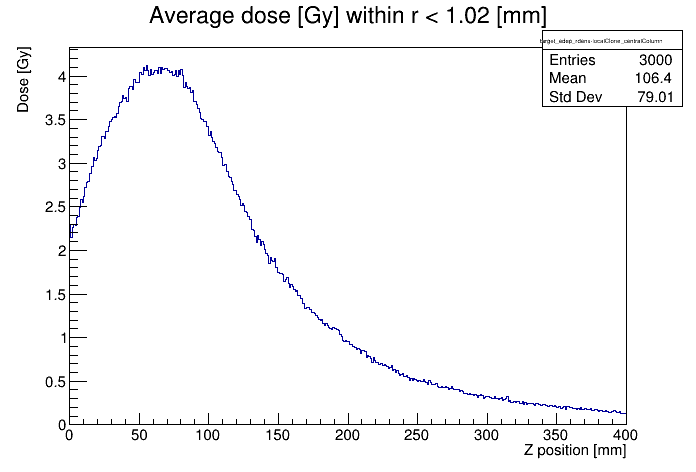

In [17]:
rzScaled_center_ewf = miniScatterPlots.plotZgray(rzScaled_ewf, 1)
rzScaled_center_ewf.GetXaxis().SetRangeUser(0,400)
canvas = ROOT.TCanvas()
rzScaled_center_ewf.Draw()
canvas.Draw()

### Proton pencil beam
Note: Just a code example, not verified physics!

In [18]:
baseSimSetup_p = baseSimSetup.copy()
baseSimSetup_p["BEAM"] = "proton"
baseSimSetup_p["OUTNAME"]="protons"

(twiss_p, numPart_p, objects_p) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_p, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/protons.root', loading!


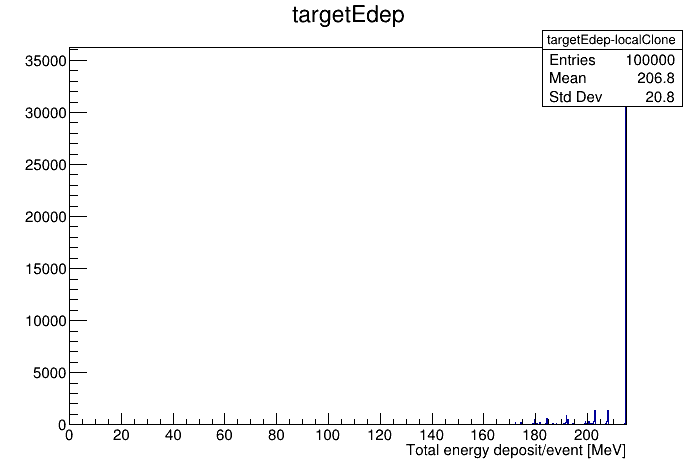

In [19]:
cc1 = ROOT.TCanvas()
objects_p['targetEdep'].Draw()
cc1.Draw()

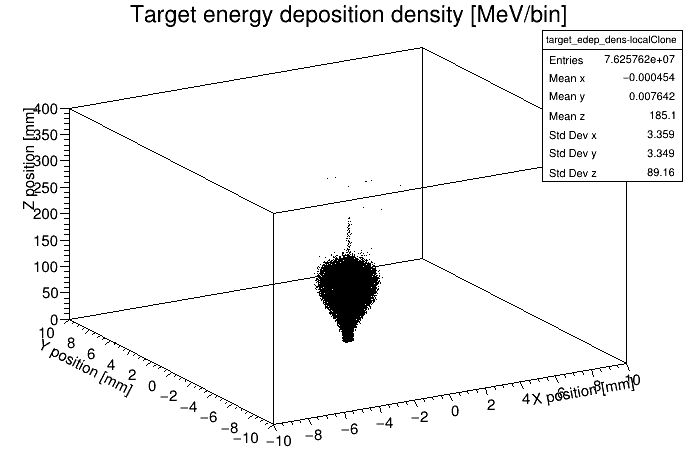

In [20]:
cc2 = ROOT.TCanvas()
objects_p['target_edep_dens'].GetZaxis().SetRangeUser(0,400)
objects_p['target_edep_dens'].Draw()
cc2.Draw()

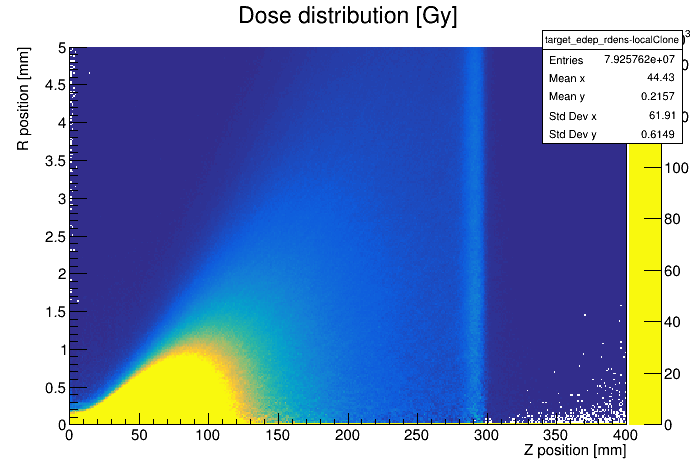

In [21]:
rzScaled_p = miniScatterPlots.plotRZgray(objects_p, baseSimSetup_p["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
rzScaled_p.SetContour(100, np.linspace(0,50,100))
rzScaled_p.GetXaxis().SetRangeUser(0,400)
rzScaled_p.GetYaxis().SetRangeUser(0,5)
rzScaled_p.Draw('colz')
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: target_edep_rdens-localClone_centralColumn (Potential memory leak).


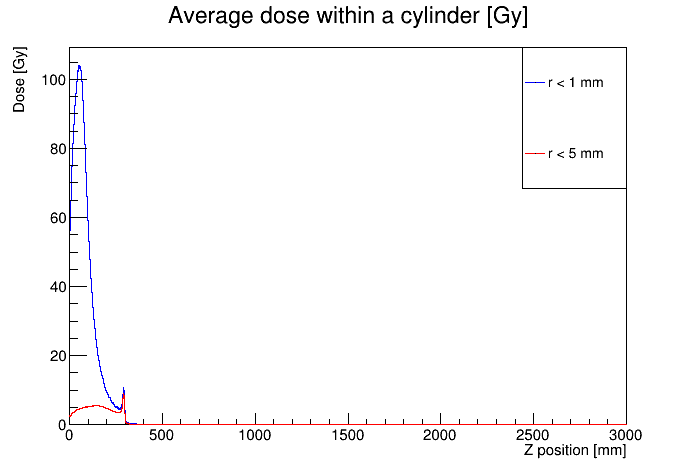

In [22]:
canvas = ROOT.TCanvas()

rzScaled_center_p1 = miniScatterPlots.plotZgray(rzScaled_p, 1)
rzScaled_center_p1.SetStats(False)
rzScaled_center_p1.SetName(rzScaled_center_p1.GetName() + "-1mm")
rzScaled_center_p1.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_p1.SetLineColor(ROOT.kBlue)
rzScaled_center_p1.Draw()

rzScaled_center_p5 = miniScatterPlots.plotZgray(rzScaled_p, 5)
rzScaled_center_p5.SetName(rzScaled_center_p1.GetName() + "-5mm")
rzScaled_center_p5.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_p5.SetLineColor(ROOT.kRed)
rzScaled_center_p5.Draw("same")

rzScaled_center_p_legend = ROOT.TLegend(0.75,0.6,0.9,0.9);
rzScaled_center_p_legend.AddEntry(rzScaled_center_p1,"r < 1 mm")
rzScaled_center_p_legend.AddEntry(rzScaled_center_p5,"r < 5 mm")
rzScaled_center_p_legend.Draw()

canvas.Draw()

### Protons, 3 mm wide uniform beam
Note: Just a code example, not verified physics!

In [23]:
baseSimSetup_pw = baseSimSetup.copy()
baseSimSetup_pw["BEAM"] = "proton"
baseSimSetup_pw["OUTNAME"]="protons-flat"
baseSimSetup_pw["BEAM_RCUT"] = 3.0

(twiss_pw, numPart_pw, objects_pw) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_pw, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/protons-flat.root', loading!


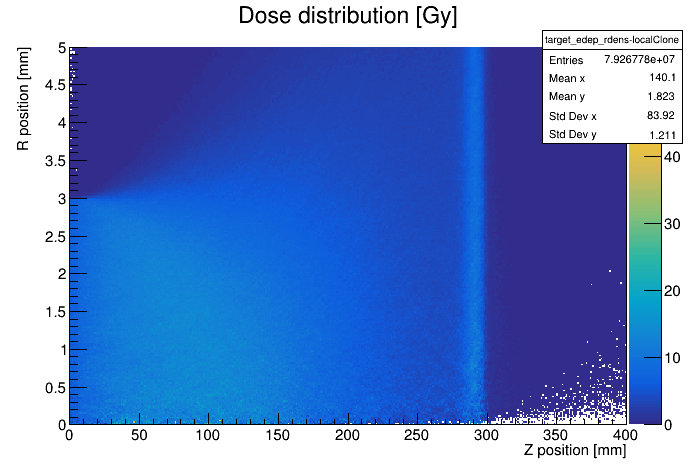

In [24]:
rzScaled_pw = miniScatterPlots.plotRZgray(objects_pw, baseSimSetup_pw["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
rzScaled_pw.SetContour(100, np.linspace(0,50,100))
rzScaled_pw.GetXaxis().SetRangeUser(0,400)
rzScaled_pw.GetYaxis().SetRangeUser(0,5)
rzScaled_pw.Draw('colz')
canvas.Draw()

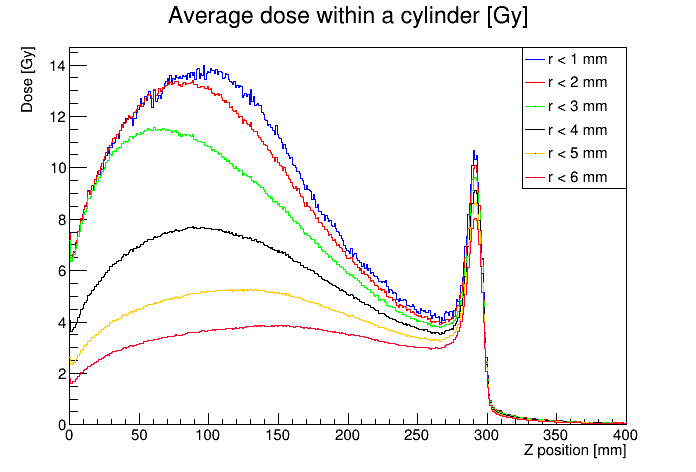

In [25]:
canvas = ROOT.TCanvas()
rzScaled_center_pw1 = miniScatterPlots.plotZgray(rzScaled_pw, 1)
rzScaled_center_pw1.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw1.SetName(rzScaled_center_pw1.GetName() + "-1mm")
rzScaled_center_pw1.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw1.SetLineColor(ROOT.kBlue)
rzScaled_center_pw1.SetStats(False)
rzScaled_center_pw1.Draw()

rzScaled_center_pw2 = miniScatterPlots.plotZgray(rzScaled_pw, 2)
rzScaled_center_pw2.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw2.SetName(rzScaled_center_pw2.GetName() + "-2mm")
rzScaled_center_pw2.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw2.SetLineColor(ROOT.kRed)
rzScaled_center_pw2.Draw("same")

rzScaled_center_pw3 = miniScatterPlots.plotZgray(rzScaled_pw, 3)
rzScaled_center_pw3.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw3.SetName(rzScaled_center_pw3.GetName() + "-3mm")
rzScaled_center_pw3.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw3.SetLineColor(ROOT.kGreen)
rzScaled_center_pw3.Draw("same")

rzScaled_center_pw4 = miniScatterPlots.plotZgray(rzScaled_pw, 4)
rzScaled_center_pw4.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw4.SetName(rzScaled_center_pw4.GetName() + "-4mm")
rzScaled_center_pw4.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw4.SetLineColor(ROOT.kBlack)
rzScaled_center_pw4.Draw("same")

rzScaled_center_pw5 = miniScatterPlots.plotZgray(rzScaled_pw, 5)
rzScaled_center_pw5.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw5.SetName(rzScaled_center_pw5.GetName() + "-5mm")
rzScaled_center_pw5.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw5.SetLineColor(ROOT.kOrange)
rzScaled_center_pw5.Draw("same")

rzScaled_center_pw6 = miniScatterPlots.plotZgray(rzScaled_pw, 6)
rzScaled_center_pw6.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw6.SetName(rzScaled_center_pw6.GetName() + "-6mm")
rzScaled_center_pw6.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw6.SetLineColor(ROOT.kPink)
rzScaled_center_pw6.Draw("same")

rzScaled_center_pw_legend = ROOT.TLegend(0.75,0.6,0.9,0.9);
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw1,"r < 1 mm")
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw2,"r < 2 mm")
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw3,"r < 3 mm")
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw4,"r < 4 mm")
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw5,"r < 5 mm")
rzScaled_center_pw_legend.AddEntry(rzScaled_center_pw6,"r < 6 mm")
rzScaled_center_pw_legend.Draw()

canvas.Draw()

### Protons, 6 mm wide uniform beam
Note: Just a code example, not verified physics!

In [26]:
baseSimSetup_pw2 = baseSimSetup.copy()
baseSimSetup_pw2["BEAM"] = "proton"
baseSimSetup_pw2["OUTNAME"]="protons-flat2"
baseSimSetup_pw2["BEAM_RCUT"] = 6.0

(twiss_pw2, numPart_pw2, objects_pw2) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_pw2, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/protons-flat2.root', loading!


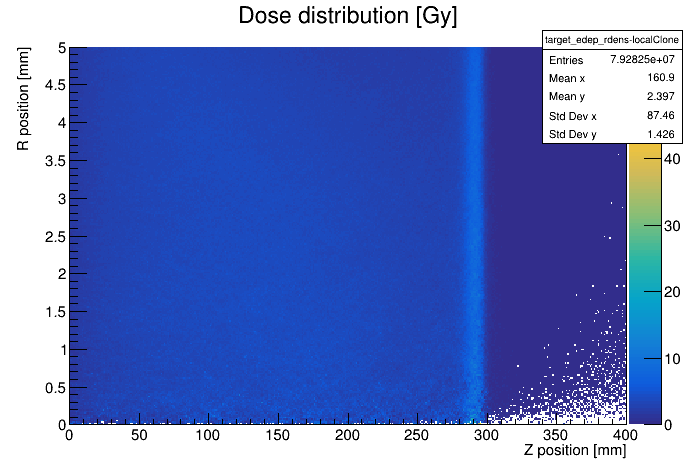

In [27]:
rzScaled_pw2 = miniScatterPlots.plotRZgray(objects_pw2, baseSimSetup_pw2["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
rzScaled_pw2.SetContour(100, np.linspace(0,50,100))
rzScaled_pw2.GetXaxis().SetRangeUser(0,400)
rzScaled_pw2.GetYaxis().SetRangeUser(0,5)
rzScaled_pw2.Draw('colz')
canvas.Draw()

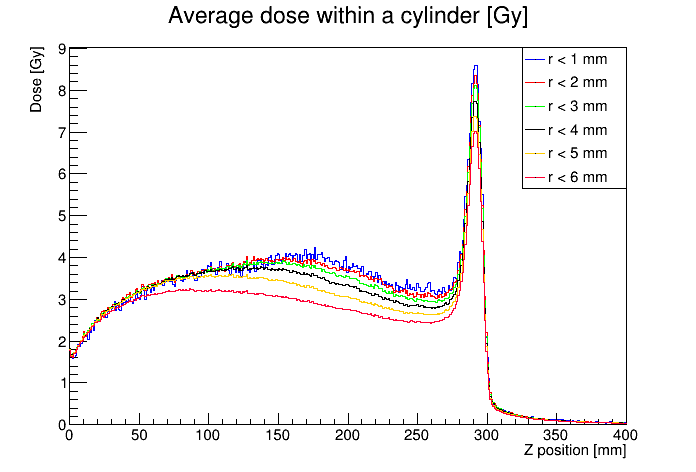

In [28]:
canvas = ROOT.TCanvas()
rzScaled_center_pw21 = miniScatterPlots.plotZgray(rzScaled_pw2, 1)
rzScaled_center_pw21.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw21.SetName(rzScaled_center_pw21.GetName() + "-1mm")
rzScaled_center_pw21.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw21.SetLineColor(ROOT.kBlue)
rzScaled_center_pw21.SetStats(False)
rzScaled_center_pw21.Draw()

rzScaled_center_pw22 = miniScatterPlots.plotZgray(rzScaled_pw2, 2)
rzScaled_center_pw22.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw22.SetName(rzScaled_center_pw22.GetName() + "-2mm")
rzScaled_center_pw22.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw22.SetLineColor(ROOT.kRed)
rzScaled_center_pw22.Draw("same")

rzScaled_center_pw23 = miniScatterPlots.plotZgray(rzScaled_pw2, 3)
rzScaled_center_pw23.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw23.SetName(rzScaled_center_pw23.GetName() + "-3mm")
rzScaled_center_pw23.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw23.SetLineColor(ROOT.kGreen)
rzScaled_center_pw23.Draw("same")

rzScaled_center_pw24 = miniScatterPlots.plotZgray(rzScaled_pw2, 4)
rzScaled_center_pw24.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw24.SetName(rzScaled_center_pw24.GetName() + "-4mm")
rzScaled_center_pw24.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw24.SetLineColor(ROOT.kBlack)
rzScaled_center_pw24.Draw("same")

rzScaled_center_pw25 = miniScatterPlots.plotZgray(rzScaled_pw2, 5)
rzScaled_center_pw25.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw25.SetName(rzScaled_center_pw25.GetName() + "-5mm")
rzScaled_center_pw25.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw25.SetLineColor(ROOT.kOrange)
rzScaled_center_pw25.Draw("same")

rzScaled_center_pw26 = miniScatterPlots.plotZgray(rzScaled_pw2, 6)
rzScaled_center_pw26.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw26.SetName(rzScaled_center_pw26.GetName() + "-6mm")
rzScaled_center_pw26.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw26.SetLineColor(ROOT.kPink)
rzScaled_center_pw26.Draw("same")

rzScaled_center_pw2_legend = ROOT.TLegend(0.75,0.6,0.9,0.9);
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw21,"r < 1 mm")
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw22,"r < 2 mm")
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw23,"r < 3 mm")
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw24,"r < 4 mm")
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw25,"r < 5 mm")
rzScaled_center_pw2_legend.AddEntry(rzScaled_center_pw26,"r < 6 mm")
rzScaled_center_pw2_legend.Draw()

canvas.Draw()

### Carbon pencil beam
Note: Just a code example, not verified physics!

In [29]:
baseSimSetup_c = baseSimSetup.copy()
baseSimSetup_c["BEAM"] = "ion::6;12"
baseSimSetup_c["OUTNAME"]="carbon"
baseSimSetup_c["N"]=baseSimSetup_c["N"]/100
baseSimSetup_c["ENERGY"]=baseSimSetup["ENERGY"]*12 #Same MeV/u
baseSimSetup_c["PHYS"] = "QGSP_BIC_EMY" #Recommended for Bragg Peak Physics

#miniScatterDriver.runScatter(baseSimSetup_c)
(twiss_c, numPart_c, objects_c) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_c, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/carbon.root', loading!


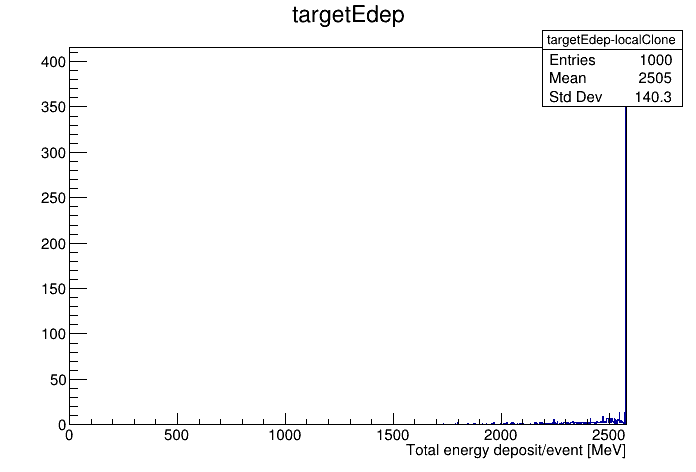

In [30]:
ccc1 = ROOT.TCanvas()
objects_c['targetEdep'].Draw()
ccc1.Draw()

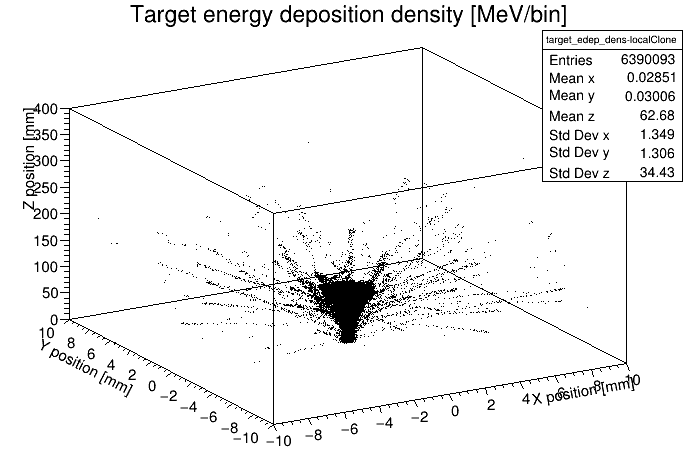

In [31]:
ccc2 = ROOT.TCanvas()
objects_c['target_edep_dens'].GetZaxis().SetRangeUser(0,400)
objects_c['target_edep_dens'].Draw()
ccc2.Draw()

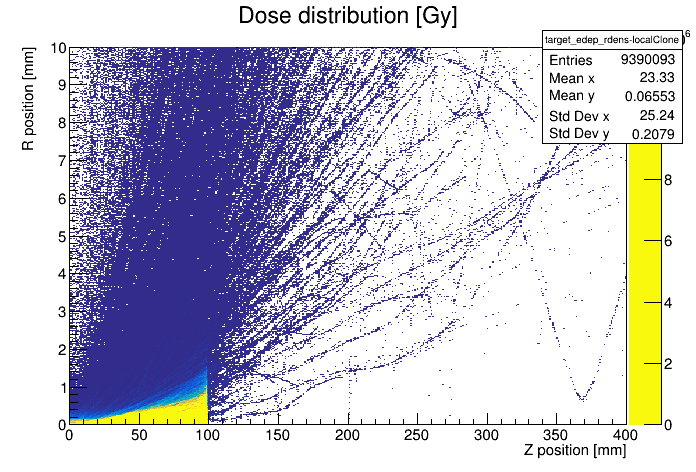

In [32]:

rzScaled_c = miniScatterPlots.plotRZgray(objects_c, baseSimSetup_c["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
rzScaled_c.SetContour(100, np.linspace(0,10e3,100))
rzScaled_c.GetXaxis().SetRangeUser(0,400)
rzScaled_c.GetYaxis().SetRangeUser(0,10)
rzScaled_c.Draw('colz')
canvas.Draw()

### Carbon, 3 mm wide uniform beam
Note: Just a code example, not verified physics!

In [33]:
baseSimSetup_cw = baseSimSetup.copy()
baseSimSetup_cw["BEAM"] = "ion::6;12"
baseSimSetup_cw["OUTNAME"]="carbon-wide"
baseSimSetup_cw["BEAM_RCUT"] = 3.0
baseSimSetup_cw["N"]=baseSimSetup_cw["N"]/100
baseSimSetup_cw["ENERGY"]=baseSimSetup["ENERGY"]*12 #Same MeV/u
baseSimSetup_cw["PHYS"] = "QGSP_BIC_EMY" #Recommended for Bragg Peak Physics

#miniScatterDriver.runScatter(baseSimSetup_c)
(twiss_cw, numPart_cw, objects_cw) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_cw, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

Found a file at '/mn/fys-server1/a9/kyrrens/MiniScatter/examples/DoseDepthDeposition/carbon-wide.root', loading!


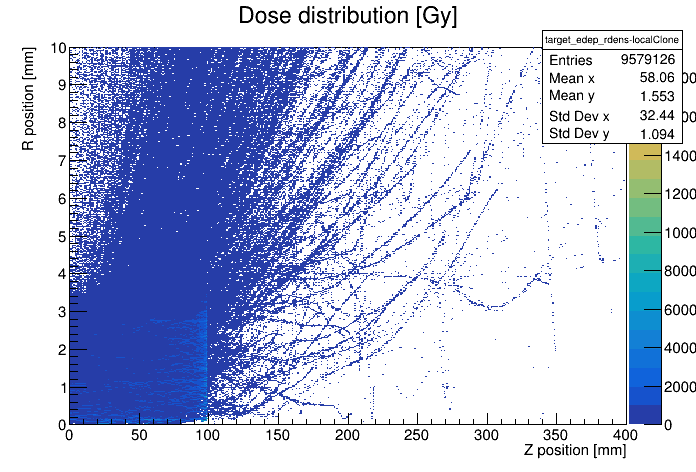

In [34]:
rzScaled_cw = miniScatterPlots.plotRZgray(objects_cw, baseSimSetup_cw["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
#rzScaled_cw.SetContour(100, np.linspace(0,50e3,100))
rzScaled_cw.GetXaxis().SetRangeUser(0,400)
rzScaled_cw.GetYaxis().SetRangeUser(0,10)
rzScaled_cw.Draw('colz')
canvas.Draw()

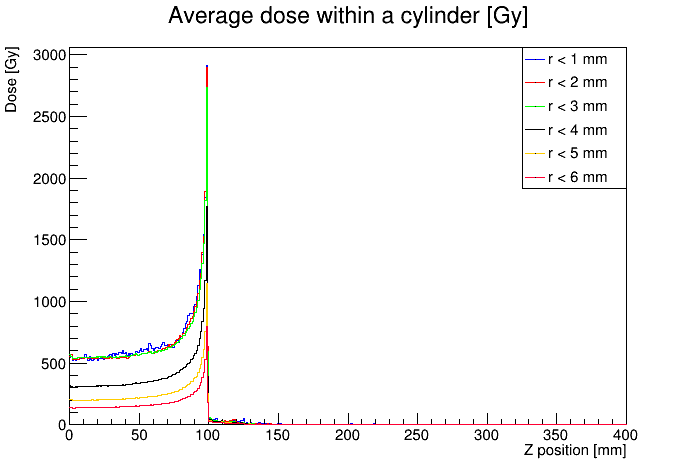

In [35]:
canvas = ROOT.TCanvas()
rzScaled_center_cw1 = miniScatterPlots.plotZgray(rzScaled_cw, 1)
rzScaled_center_cw1.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw1.SetName(rzScaled_center_cw1.GetName() + "-1mm")
rzScaled_center_cw1.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw1.SetLineColor(ROOT.kBlue)
rzScaled_center_cw1.SetStats(False)
rzScaled_center_cw1.Draw()

rzScaled_center_cw2 = miniScatterPlots.plotZgray(rzScaled_cw, 2)
rzScaled_center_cw2.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw2.SetName(rzScaled_center_cw2.GetName() + "-2mm")
rzScaled_center_cw2.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw2.SetLineColor(ROOT.kRed)
rzScaled_center_cw2.Draw("same")

rzScaled_center_cw3 = miniScatterPlots.plotZgray(rzScaled_cw, 3)
rzScaled_center_cw3.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw3.SetName(rzScaled_center_cw3.GetName() + "-3mm")
rzScaled_center_cw3.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw3.SetLineColor(ROOT.kGreen)
rzScaled_center_cw3.Draw("same")

rzScaled_center_cw4 = miniScatterPlots.plotZgray(rzScaled_cw, 4)
rzScaled_center_cw4.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw4.SetName(rzScaled_center_cw4.GetName() + "-4mm")
rzScaled_center_cw4.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw4.SetLineColor(ROOT.kBlack)
rzScaled_center_cw4.Draw("same")

rzScaled_center_cw5 = miniScatterPlots.plotZgray(rzScaled_cw, 5)
rzScaled_center_cw5.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw5.SetName(rzScaled_center_cw4.GetName() + "-5mm")
rzScaled_center_cw5.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw5.SetLineColor(ROOT.kOrange)
rzScaled_center_cw5.Draw("same")

rzScaled_center_cw6 = miniScatterPlots.plotZgray(rzScaled_cw, 6)
rzScaled_center_cw6.GetXaxis().SetRangeUser(0,400)
rzScaled_center_cw6.SetName(rzScaled_center_cw4.GetName() + "-6mm")
rzScaled_center_cw6.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_cw6.SetLineColor(ROOT.kPink)
rzScaled_center_cw6.Draw("same")

rzScaled_center_cw_legend = ROOT.TLegend(0.75,0.6,0.9,0.9);
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw1,"r < 1 mm")
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw2,"r < 2 mm")
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw3,"r < 3 mm")
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw4,"r < 4 mm")
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw5,"r < 5 mm")
rzScaled_center_cw_legend.AddEntry(rzScaled_center_cw6,"r < 6 mm")
rzScaled_center_cw_legend.Draw()

canvas.Draw()